In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("wine.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0,1


In [4]:
df.isnull().value_counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH     sulfates  alcohol  quality  color  is_red  high_quality
False          False             False        False           False      False                False                 False    False  False     False    False    False  False   False           6497
dtype: int64

In [5]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulfates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['density', 'sulfates', 'residual_sugar']], df['high_quality'],
                                                    test_size=.3)
display(x_train)
display(y_test)
display(y_train)
display(y_test)

,density,sulfates,residual_sugar
4355,0.99882,0.52,11.8
1150,0.99473,0.76,2.8
2634,0.99420,0.67,1.8
4476,0.99482,0.40,5.9
587,0.99670,0.59,1.9
...,...,...,...
5909,0.99545,0.39,9.8
5355,0.99243,0.50,2.9
2201,0.99050,0.28,1.1
3508,0.99660,0.39,9.3


5478    0
50      0
1906    0
1768    0
1751    0
       ..
154     0
1327    0
4393    0
339     1
800     0
Name: high_quality, Length: 1950, dtype: int64

4355    0
1150    1
2634    0
4476    0
587     0
       ..
5909    0
5355    0
2201    0
3508    0
4276    0
Name: high_quality, Length: 4547, dtype: int64

5478    0
50      0
1906    0
1768    0
1751    0
       ..
154     0
1327    0
4393    0
339     1
800     0
Name: high_quality, Length: 1950, dtype: int64

In [8]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier

KNeighborsClassifier(n_neighbors=3)

In [10]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
prediction = classifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
correct = np.where(prediction == y_test, 1, 0).sum()
correct

1486

In [16]:
accuracy = correct / len(y_test)
print(accuracy)

0.762051282051282


In [17]:
results = []
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    accuracy = np.where(prediction == y_test, 1, 0).sum() / (len(y_test))
    print("k=", k, "Accuracy=", accuracy)
    # Storing the k,accuracy tuple in results array
    results.append([k, accuracy])

results

k= 1 Accuracy= 0.7753846153846153
k= 3 Accuracy= 0.762051282051282
k= 5 Accuracy= 0.7753846153846153
k= 7 Accuracy= 0.7794871794871795
k= 9 Accuracy= 0.7871794871794872
k= 11 Accuracy= 0.7892307692307692
k= 13 Accuracy= 0.7912820512820513
k= 15 Accuracy= 0.7897435897435897
k= 17 Accuracy= 0.7897435897435897
k= 19 Accuracy= 0.7928205128205128
k= 21 Accuracy= 0.7948717948717948
k= 23 Accuracy= 0.7928205128205128
k= 25 Accuracy= 0.7923076923076923
k= 27 Accuracy= 0.7964102564102564
k= 29 Accuracy= 0.7979487179487179
k= 31 Accuracy= 0.7964102564102564
k= 33 Accuracy= 0.7958974358974359
k= 35 Accuracy= 0.7974358974358975
k= 37 Accuracy= 0.796923076923077
k= 39 Accuracy= 0.7974358974358975
k= 41 Accuracy= 0.7974358974358975
k= 43 Accuracy= 0.7979487179487179
k= 45 Accuracy= 0.796923076923077
k= 47 Accuracy= 0.7964102564102564
k= 49 Accuracy= 0.7964102564102564


[[1, 0.7753846153846153],
 [3, 0.762051282051282],
 [5, 0.7753846153846153],
 [7, 0.7794871794871795],
 [9, 0.7871794871794872],
 [11, 0.7892307692307692],
 [13, 0.7912820512820513],
 [15, 0.7897435897435897],
 [17, 0.7897435897435897],
 [19, 0.7928205128205128],
 [21, 0.7948717948717948],
 [23, 0.7928205128205128],
 [25, 0.7923076923076923],
 [27, 0.7964102564102564],
 [29, 0.7979487179487179],
 [31, 0.7964102564102564],
 [33, 0.7958974358974359],
 [35, 0.7974358974358975],
 [37, 0.796923076923077],
 [39, 0.7974358974358975],
 [41, 0.7974358974358975],
 [43, 0.7979487179487179],
 [45, 0.796923076923077],
 [47, 0.7964102564102564],
 [49, 0.7964102564102564]]

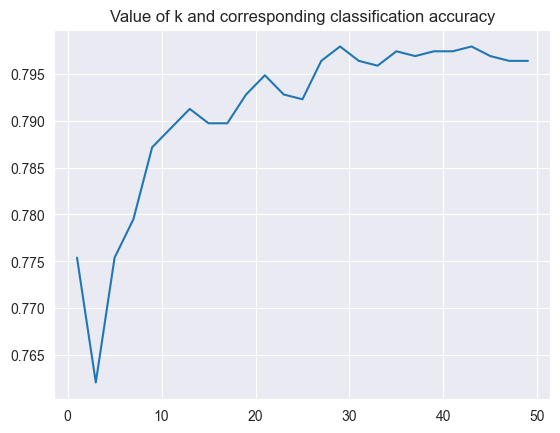

In [18]:
results = pd.DataFrame(results, columns=["k", "accuracy"])
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()

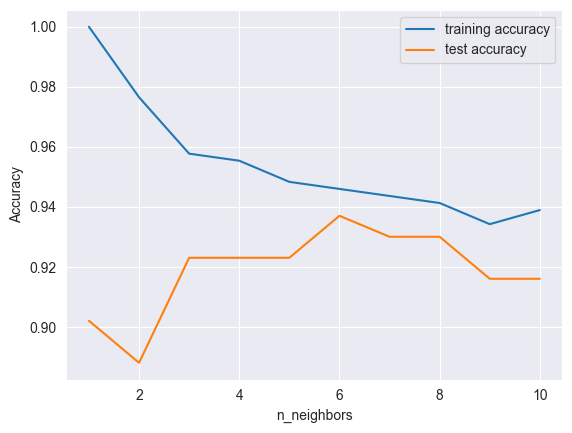

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:  # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)  # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))  # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [21]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3